In [ ]:
### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
excel_bautista = pd.DataFrame()

<ipython-input-3-b10d356f9bb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horo1['RecordStart'][i] = '2020/'+horo1['RecordStart'][i]+':00'
<ipython-input-3-b10d356f9bb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horo1['RecordStart'][i] = '2021/'+horo1['RecordStart'][i]+':00'


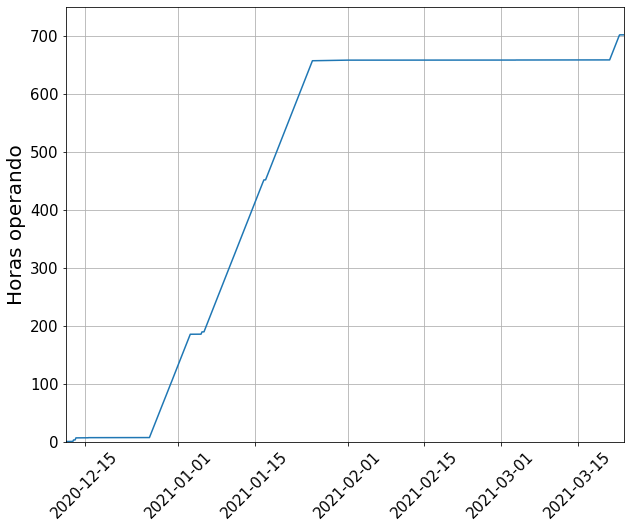

In [3]:
horo1 = pd.read_csv('450 MCR Los Bronces/horometro_1.csv',skipinitialspace=True)
for i in range(0,5672):
    horo1['RecordStart'][i] = '2020/'+horo1['RecordStart'][i]+':00'
for i in range(5672,len(horo1['RecordStart'])):
    horo1['RecordStart'][i] = '2021/'+horo1['RecordStart'][i]+':00'
horo1['RecordStart'] = pd.to_datetime(horo1['RecordStart'],format='%Y/%d/%m %H:%M:%S')
horo1['RecordStart'] = horo1['RecordStart'].dt.strftime('%Y/%m/%d %H:%M:%S')

horo5 = pd.read_csv('450 MCR Los Bronces/horometro_5_yo.csv',skipinitialspace=True)
horo5.drop([0],axis=0,inplace=True)
horo6 = pd.read_csv('450 MCR Los Bronces/horometro_6_yo.csv',skipinitialspace=True)
horo6.drop([0],axis=0,inplace=True)
horo7 = pd.read_csv('450 MCR Los Bronces/horometro_7_yo.csv',skipinitialspace=True)
horo7.drop([0],axis=0,inplace=True)

horo = horo1.append([horo5,horo6,horo7],ignore_index=True)
horo['RecordStart'] = pd.to_datetime(horo['RecordStart'],format='%Y/%m/%d %H:%M:%S')
horo.set_index(['RecordStart'],inplace=True)

plt.figure(figsize=(10,8))
plt.plot(horo.index,horo)
plt.grid()
plt.ylabel('Horas operando',fontsize=20)
plt.xlim([horo.index[0],horo.index[len(horo)-1]])
plt.ylim([0,750])
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [4]:
##### Proceso 
proceso = pd.read_excel('450 MCR Los Bronces/proceso_1.xlsx',skipinitialspace=True)
proceso.drop('Nivel Cuba (%)', inplace=True, axis=1)
proceso.drop('Running', inplace=True, axis=1)
proceso.drop('Presión Hidrociclones (psi).1', inplace=True, axis=1)
proceso.drop('Flujo Bomba (m3/hr).1', inplace=True, axis=1)
proceso.drop('Nivel Cuba (%).1', inplace=True, axis=1)
proceso.drop('Velocidad Motor (rpm).1', inplace=True, axis=1)
proceso.drop('Corriente motor (A).1', inplace=True, axis=1)
proceso.drop('Unnamed: 12', inplace=True, axis=1)
proceso.drop('Unnamed: 13', inplace=True, axis=1)
proceso.dropna(inplace=True)

proceso_mio1 = pd.read_csv('450 MCR Los Bronces/mis_datos/proceso_1_mio.csv',skipinitialspace=True)
proceso_mio1.dropna(inplace=True)
proceso_mio2 = pd.read_csv('450 MCR Los Bronces/mis_datos/proceso_2_mio.csv',skipinitialspace=True)
proceso_mio2.dropna(inplace=True)
proceso_mio = pd.concat([proceso_mio1,proceso_mio2],ignore_index=True)

proceso_mio.rename(columns= {"PumpFluid_Flow_Eng_Raw": "Flujo Bomba (m3/hr)",
                            "Motor_Current_Eng_Raw": "Corriente motor (A)",
                            "Motor_Speed_Eng_Raw": "Velocidad Motor (rpm)",
                            "CycloneManifold_Pressure_Eng_Raw": "Presión Hidrociclones (psi)"},inplace=True)
proceso_mio = proceso_mio[["RecordStart","Presión Hidrociclones (psi)","Flujo Bomba (m3/hr)","Velocidad Motor (rpm)","Corriente motor (A)"]]

proceso = pd.concat([proceso,proceso_mio],ignore_index=True)

proceso['RecordStart'] = pd.to_datetime(proceso['RecordStart'],format='%Y/%m/%d %H:%M:%S')
proceso.set_index(['RecordStart'],inplace=True)

### Temperatura
temp = pd.read_excel('450 MCR Los Bronces/temperatura_1.xlsx',skipinitialspace=True)
temp.drop('Unnamed: 3', inplace=True, axis=1)
temp.drop('Unnamed: 4', inplace=True, axis=1)
temp.drop('Unnamed: 5', inplace=True, axis=1)
temp.dropna(inplace=True)

temp_mio1 = pd.read_csv('450 MCR Los Bronces/mis_datos/temp_1_mio.csv',skipinitialspace=True)
temp_mio2 = pd.read_csv('450 MCR Los Bronces/mis_datos/temp_2_mio.csv',skipinitialspace=True)
temp_mio = pd.concat([temp_mio1,temp_mio2],ignore_index=True)
temp_mio.dropna(inplace=True)

temp_mio.rename(columns= {"BearingDriveEnd_Temp_Eng_Raw": "Temperatura Lado Motor",
                            "BearingWetEnd_Temp_Eng_Raw": "Temperatura Lado Bomba"},inplace=True)

temp = pd.concat([temp,temp_mio],ignore_index=True)

temp['RecordStart'] = pd.to_datetime(temp['RecordStart'],format='%Y/%m/%d %H:%M:%S')
temp.set_index(['RecordStart'],inplace=True)

### Eficiencia hidraulica
hid2 = pd.read_csv('450 MCR Los Bronces/hidraulica_2.csv',skipinitialspace=True)
hid3 = pd.read_csv('450 MCR Los Bronces/hidraulica_3.csv',skipinitialspace=True)
hid4 = pd.read_csv('450 MCR Los Bronces/hidraulica_4.csv',skipinitialspace=True)

hid = pd.concat([hid2,hid3,hid4],ignore_index=True)
hid.drop('PumpElectricPower_Raw', inplace=True, axis=1)
hid.drop('PumpShaftSpeedCalc_Raw', inplace=True, axis=1)
hid.drop('PumpBEP_Deviation_Raw', inplace=True, axis=1)

hid_mio1 = pd.read_csv('450 MCR Los Bronces/mis_datos/hid_1_mio.csv',skipinitialspace=True)
hid_mio2 = pd.read_csv('450 MCR Los Bronces/mis_datos/hid_2_mio.csv',skipinitialspace=True)

hid = pd.concat([hid,hid_mio1,hid_mio2],ignore_index=True)

hid['RecordStart'] = pd.to_datetime(hid['RecordStart'],format='%Y/%m/%d %H:%M:%S')
hid.set_index(['RecordStart'],inplace=True)

### Salud
health = pd.read_excel('450 MCR Los Bronces/overall_1.xlsx',skipinitialspace=True)
health.drop('PumpWetEnd_Health_Indicator_Raw', inplace=True, axis=1)
health.dropna(inplace=True)

health_mio1 = pd.read_csv('450 MCR Los Bronces/mis_datos/health_1_mio.csv',skipinitialspace=True)
health_mio2 = pd.read_csv('450 MCR Los Bronces/mis_datos/health_2_mio.csv',skipinitialspace=True)

health = pd.concat([health,health_mio1,health_mio2],ignore_index=True)

health['RecordStart'] = pd.to_datetime(health['RecordStart'],format='%Y/%m/%d %H:%M:%S')
health.set_index(['RecordStart'],inplace=True)


### Vibracion
vib = pd.read_excel('450 MCR Los Bronces/vibración_porta_1.xlsx',skipinitialspace=True)
vib.drop('BearingWetEnd_VibAxial_TDV_RMS_Value_Raw', inplace=True, axis=1)
vib.drop('BearingWetEnd_VibHor_TDV_RMS_Value_Raw', inplace=True, axis=1)
vib.dropna(inplace=True)

vib_mio1 = pd.read_csv('450 MCR Los Bronces/mis_datos/vib_1_mio.csv',skipinitialspace=True)
vib_mio2 = pd.read_csv('450 MCR Los Bronces/mis_datos/vib_2_mio.csv',skipinitialspace=True)

vib = pd.concat([vib,vib_mio1,vib_mio2],ignore_index=True)

vib['RecordStart'] = pd.to_datetime(vib['RecordStart'],format='%Y/%m/%d %H:%M:%S')
vib.set_index(['RecordStart'],inplace=True)

proceso = proceso[:len(proceso)-438]
todo = pd.DataFrame()
todo = proceso.join(temp)
mask = todo['Temperatura Lado Motor'] < 20
todo['Flujo Bomba (m3/hr)'][mask] = 0
todo['Corriente motor (A)'][mask] = 0
todo['Velocidad Motor (rpm)'][mask] = 0

temp_para_hid = temp[4842:]
temp_para_hid = temp_para_hid.join(hid['PumpEfficiency_Raw'])
temp_para_hid.dropna(inplace=True)
mask1 = temp_para_hid['Temperatura Lado Motor'] < 20
temp_para_hid['PumpEfficiency_Raw'][mask1]= 100

health = health[:len(health)-3]
temp_para_health = pd.DataFrame()
temp_para_health = health.join(temp)
mask2 = temp_para_health['Temperatura Lado Motor'] < 20
temp_para_health['OverallHealthAndPerformance_Raw'][mask2]= 100

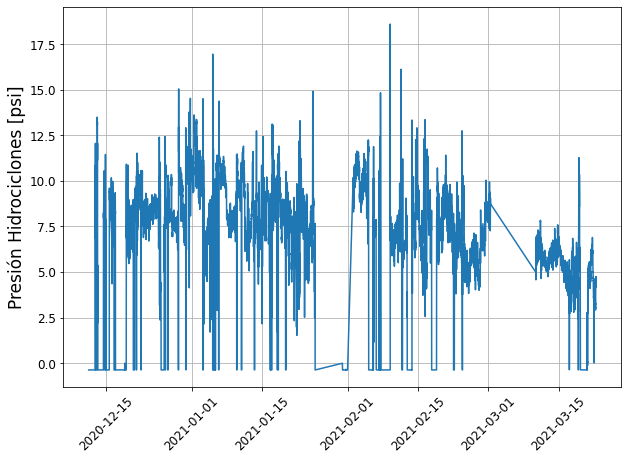

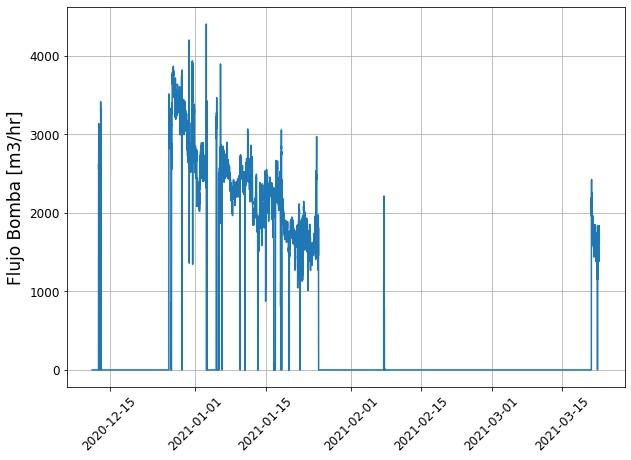

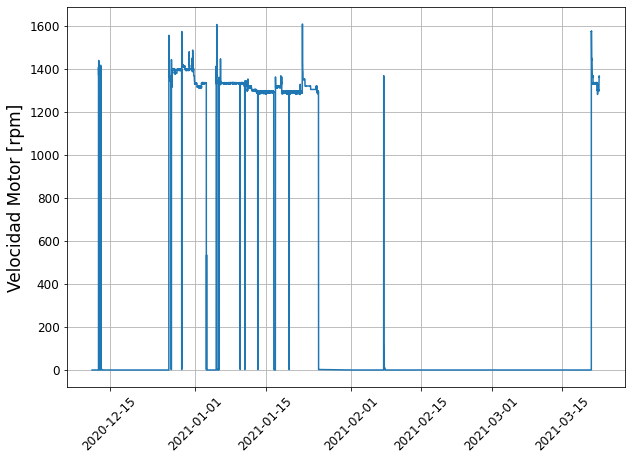

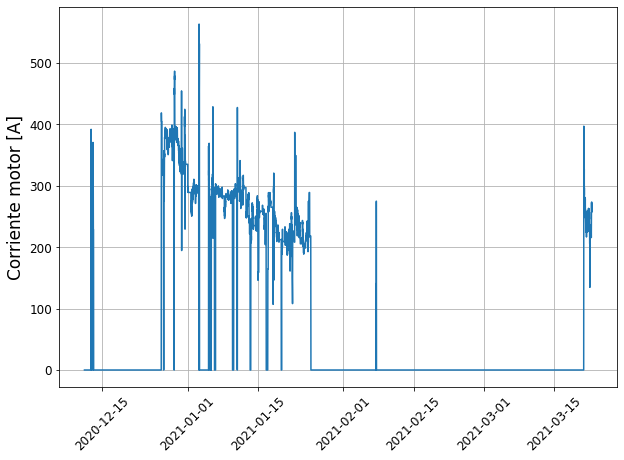

In [5]:
### Graficos proceso
plt.figure(figsize=(10,7))
plt.plot(proceso.index,proceso['Presión Hidrociclones (psi)'])
plt.ylabel('Presión Hidrociclones [psi]',fontsize=17)
plt.grid()
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(todo.index,todo['Flujo Bomba (m3/hr)'])
plt.ylabel('Flujo Bomba [m3/hr]',fontsize=17)
plt.grid()
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(todo.index,todo['Velocidad Motor (rpm)'])
plt.ylabel('Velocidad Motor [rpm]',fontsize=17)
plt.grid()
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(todo.index,todo['Corriente motor (A)'])
plt.ylabel('Corriente motor [A]',fontsize=17)
plt.grid()
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

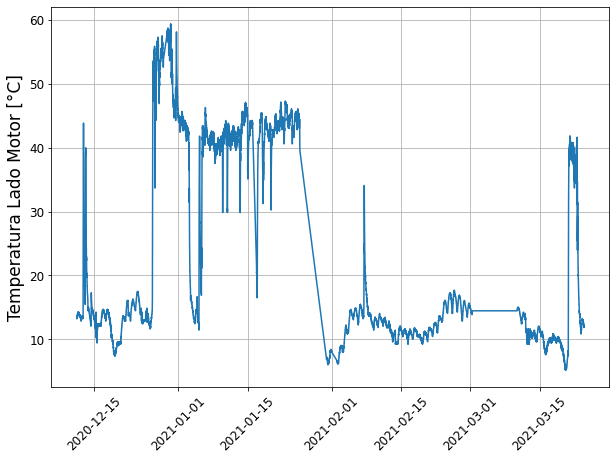

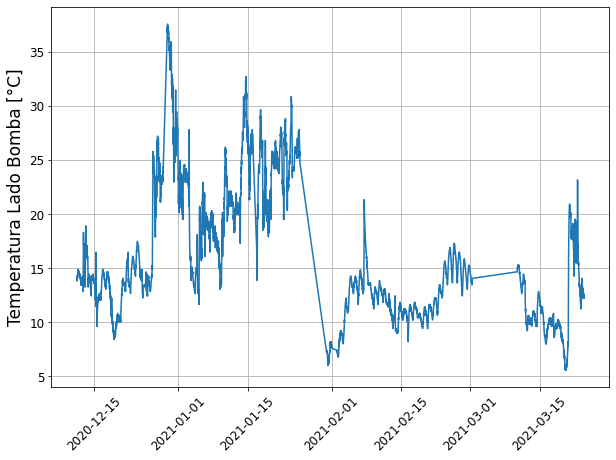

In [6]:
### Graficos temperatura
plt.figure(figsize=(10,7))
plt.plot(temp.index,temp['Temperatura Lado Motor'])
plt.ylabel('Temperatura Lado Motor [°C]',fontsize=17)
plt.grid()
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(temp.index,temp['Temperatura Lado Bomba'])
plt.grid()
plt.ylabel('Temperatura Lado Bomba [°C]',fontsize=17)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

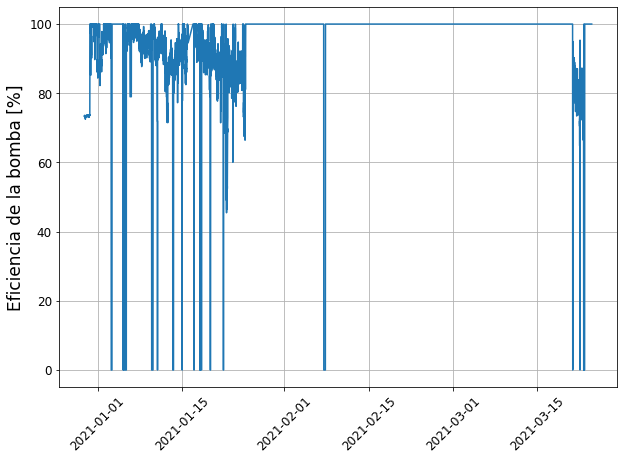

In [7]:
### Grafico eficiencia
plt.figure(figsize=(10,7))
plt.plot(temp_para_hid.index,temp_para_hid['PumpEfficiency_Raw'])
plt.grid()
plt.ylabel('Eficiencia de la bomba [%]',fontsize=17)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

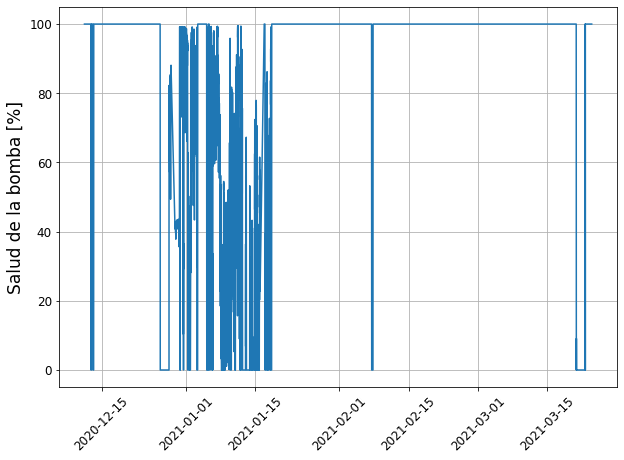

In [8]:
### Grafico salud
plt.figure(figsize=(10,7))
plt.plot(temp_para_health.index,temp_para_health['OverallHealthAndPerformance_Raw'])
plt.grid()
plt.ylabel('Salud de la bomba [%]',fontsize=17)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

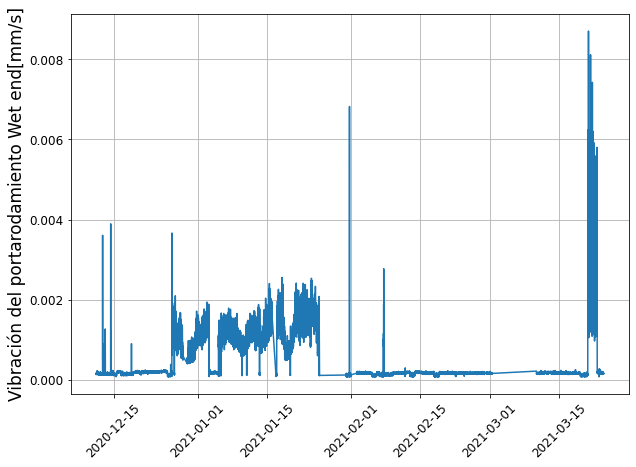

In [9]:
### Graficos vibracion
plt.figure(figsize=(10,7))
plt.plot(vib.index,vib['BearingWetEnd_VibVert_TDV_RMS_Value_Raw'])
plt.grid()
plt.ylabel('Vibración del portarodamiento Wet end[mm/s]',fontsize=17)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

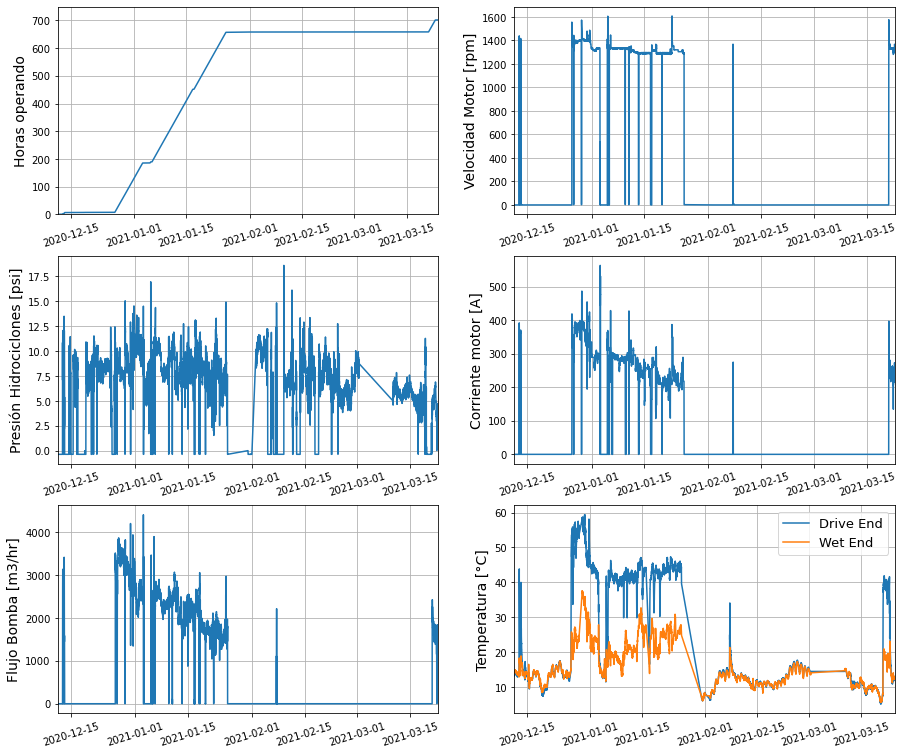

In [10]:
fig, axs = plt.subplots(3,2,figsize=(15,13))

axs[0,0].plot(horo.index,horo)
axs[0,0].tick_params(axis='x', rotation=17)
axs[0,0].grid()
axs[0,0].set_ylabel('Horas operando',fontsize=14)
axs[0,0].set_xlim([horo.index[0],horo.index[len(horo)-1]])
axs[0,0].set_ylim([0,750])

axs[1,0].plot(proceso.index,proceso['Presión Hidrociclones (psi)'])
axs[1,0].tick_params(axis='x', rotation=17)
axs[1,0].grid()
axs[1,0].set_ylabel('Presión Hidrociclones [psi]',fontsize=14)
axs[1,0].set_xlim([proceso.index[0],proceso.index[len(proceso)-1]])
excel_bautista['Presión Hidrociclones'] = proceso['Presión Hidrociclones (psi)']

axs[2,0].plot(todo.index,todo['Flujo Bomba (m3/hr)'])
axs[2,0].tick_params(axis='x', rotation=17)
axs[2,0].grid()
axs[2,0].set_ylabel('Flujo Bomba [m3/hr]',fontsize=14)
axs[2,0].set_xlim([todo.index[0],todo.index[len(proceso)-1]])
excel_bautista['Flujo Bomba'] = todo['Flujo Bomba (m3/hr)']


axs[0,1].plot(todo.index,todo['Velocidad Motor (rpm)'])
axs[0,1].tick_params(axis='x', rotation=17)
axs[0,1].grid()
axs[0,1].set_ylabel('Velocidad Motor [rpm]',fontsize=14)
axs[0,1].set_xlim([todo.index[0],todo.index[len(proceso)-1]])
excel_bautista['Velocidad'] = todo['Velocidad Motor (rpm)']


axs[1,1].plot(todo.index,todo['Corriente motor (A)'])
axs[1,1].tick_params(axis='x', rotation=17)
axs[1,1].grid()
axs[1,1].set_ylabel('Corriente motor [A]',fontsize=14)
axs[1,1].set_xlim([todo.index[0],todo.index[len(proceso)-1]])
excel_bautista['Corriente motor'] = todo['Corriente motor (A)']


axs[2,1].plot(temp.index,temp['Temperatura Lado Motor'],label='Drive End')
axs[2,1].plot(temp.index,temp['Temperatura Lado Bomba'],label='Wet End')
axs[2,1].tick_params(axis='x', rotation=17)
axs[2,1].grid()
axs[2,1].set_ylabel('Temperatura [°C]',fontsize=14)
axs[2,1].set_xlim([temp.index[0],temp.index[len(temp)-1]])
axs[2,1].legend(loc="upper right",fontsize=13)
excel_bautista['Temperatura Drive End'] = temp['Temperatura Lado Motor']
excel_bautista['Temperatura Wet End'] = temp['Temperatura Lado Bomba']

plt.show()

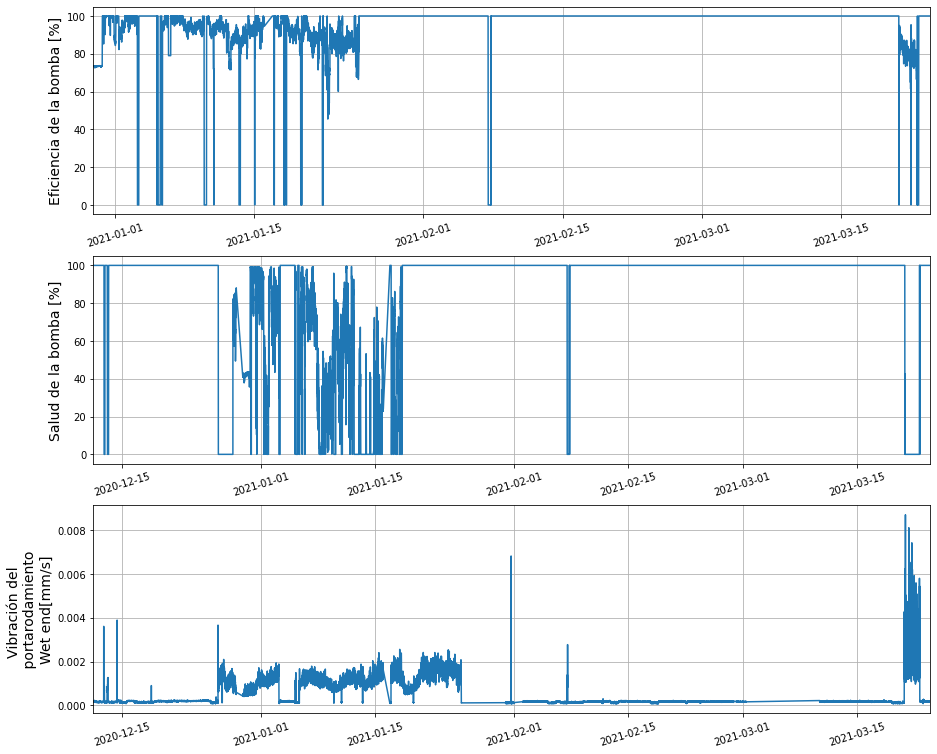

In [11]:
fig, axs = plt.subplots(3,1,figsize=(15,13))

axs[0].plot(temp_para_hid.index,temp_para_hid['PumpEfficiency_Raw'])
axs[0].tick_params(axis='x', rotation=17)
axs[0].grid()
axs[0].set_ylabel('Eficiencia de la bomba [%]',fontsize=14)
axs[0].set_xlim([temp_para_hid.index[0],temp_para_hid.index[len(temp_para_hid)-1]])
excel_bautista['Eficienia de la bomba'] = temp_para_hid['PumpEfficiency_Raw']

axs[1].plot(temp_para_health.index,temp_para_health['OverallHealthAndPerformance_Raw'])
axs[1].tick_params(axis='x', rotation=17)
axs[1].grid()
axs[1].set_ylabel('Salud de la bomba [%]',fontsize=14)
axs[1].set_xlim([temp_para_health.index[0],temp_para_health.index[len(temp_para_health)-1]])
excel_bautista['Salud Bomba'] = temp_para_health['OverallHealthAndPerformance_Raw']

axs[2].plot(vib.index,vib['BearingWetEnd_VibVert_TDV_RMS_Value_Raw'])
axs[2].tick_params(axis='x', rotation=17)
axs[2].grid()
axs[2].set_ylabel('Vibración del \n portarodamiento \nWet end[mm/s]',fontsize=14)
axs[2].set_xlim([vib.index[0],vib.index[len(vib)-1]])
excel_bautista['Vibracion portarodamiento wet end'] = vib['BearingWetEnd_VibVert_TDV_RMS_Value_Raw']

plt.show()

In [13]:
excel_bautista.dropna(inplace=True)
excel_bautista.to_excel('datos_bautista.xlsx')